In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('data/DescriptionOfColumn.csv', 'r') as f:
    descr = pd.read_csv(f)

for i in range(len(descr)):
    print(descr.iloc[i, 1].upper(), ':\n', descr.iloc[i, 2])

FIXED ACIDITY :
 This column is most acids involved with wine or fixed or nonvolatile.
(Advice: Do not evaporate readily)
VOLATILE ACIDITY :
 The amount of acetic acid in wine which at this column is too high of levels can lead to an unpleasant. This means is wine contains the high vinegar taste.
CITRIC ACID :
 When found in small quantities, citric acid can add 'freshness' and 'flavor' to wines.
RESIDUAL SUGAR :
 The amount of sugar remaining after fermentation stops. It's rare to find wines with less than 1 gram/liter. Wines with greater than 45 grams/liter are considered sweet.
CHLORIDES :
 This column gives the amount of salt in the wine.
FREE SULFUR DIOXIDE :
 The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
TOTAL SULFUR DIOXIDE  :
 Amount of free and bound forms of S02. This amount in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations

In [3]:
with open('data/WineQuality-RedWine.csv', 'r') as f:
    red_wine_ = pd.read_csv(f)

with open('data/WineQuality-WhiteWine.csv', 'r') as f:
    white_wine_ = pd.read_csv(f)

cols = red_wine_.columns.tolist()

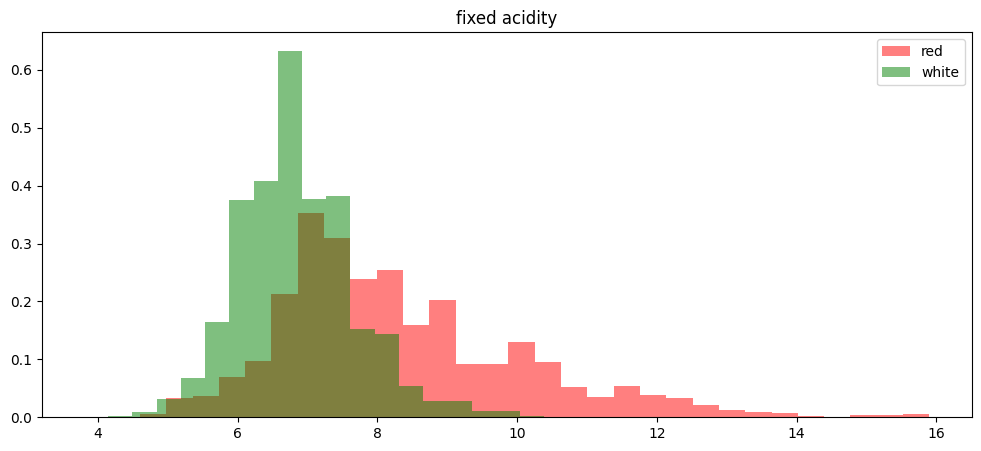

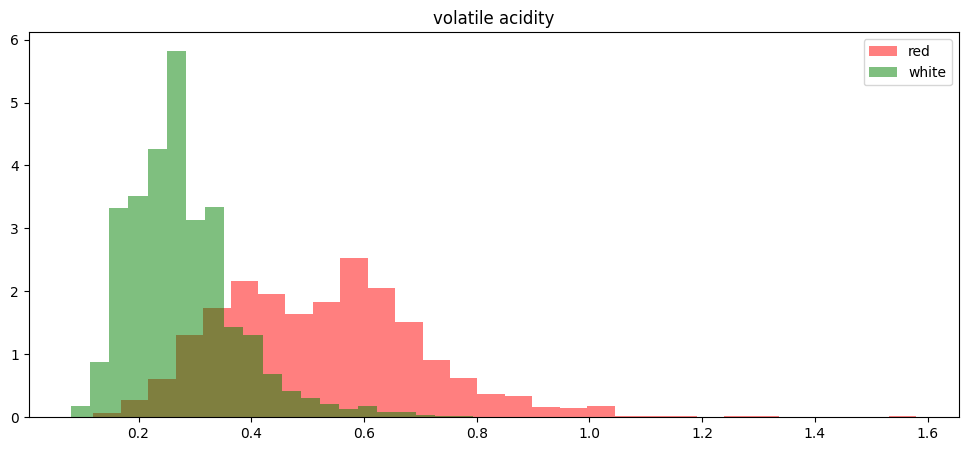

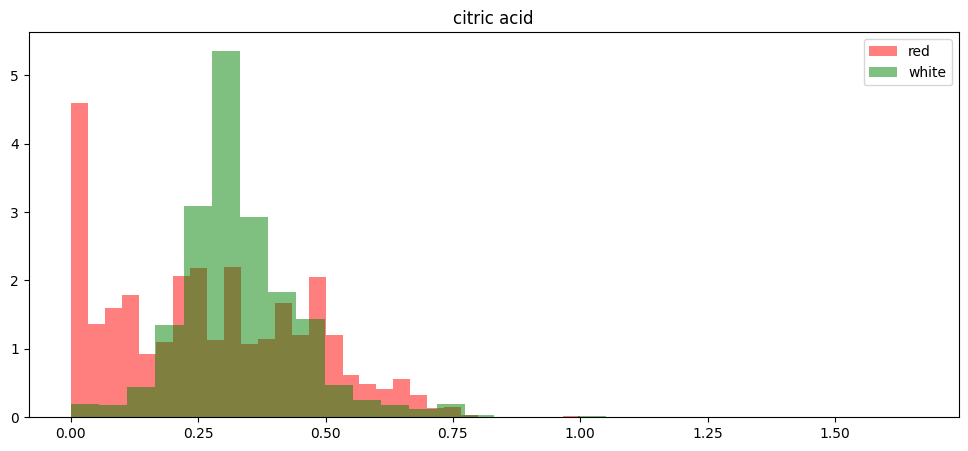

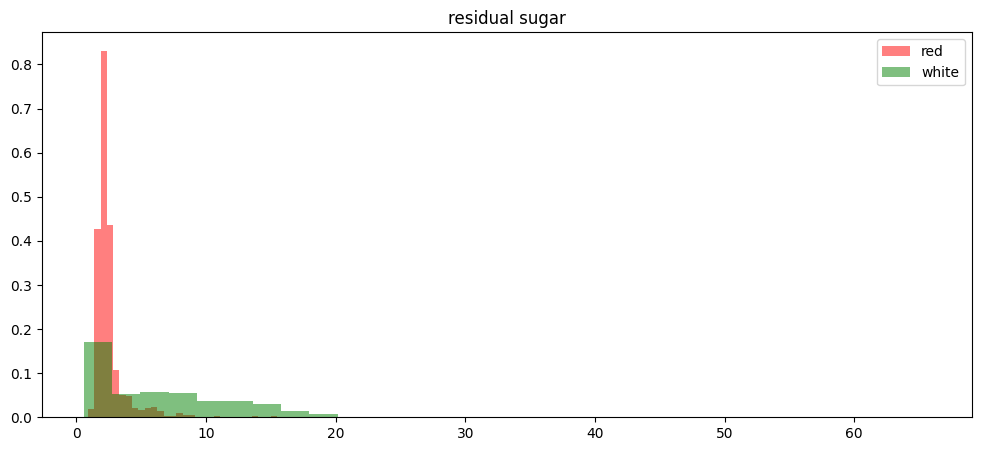

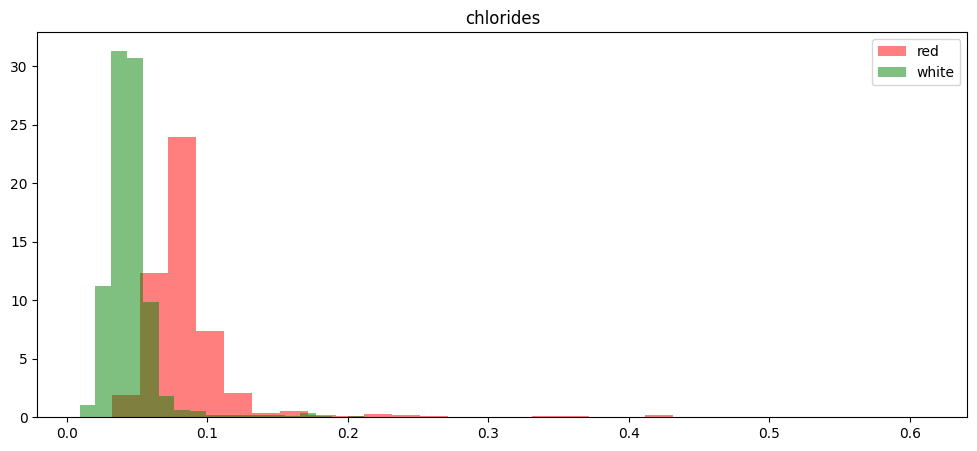

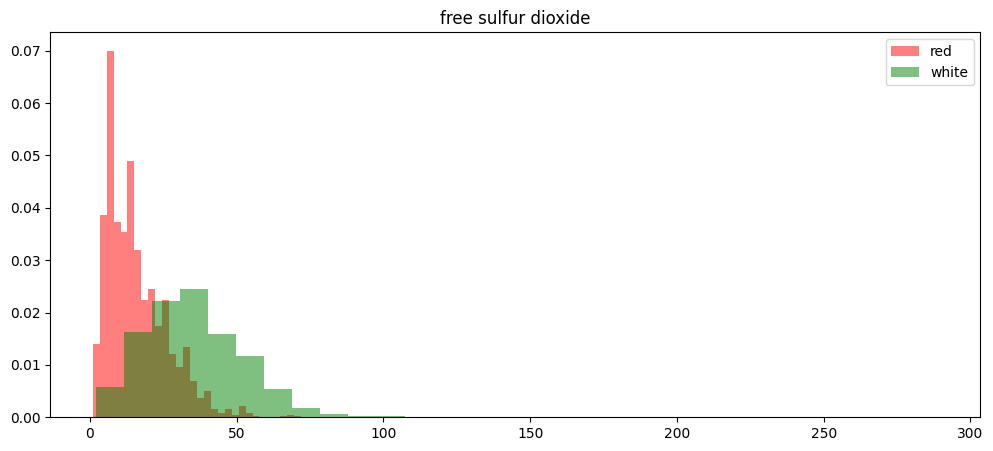

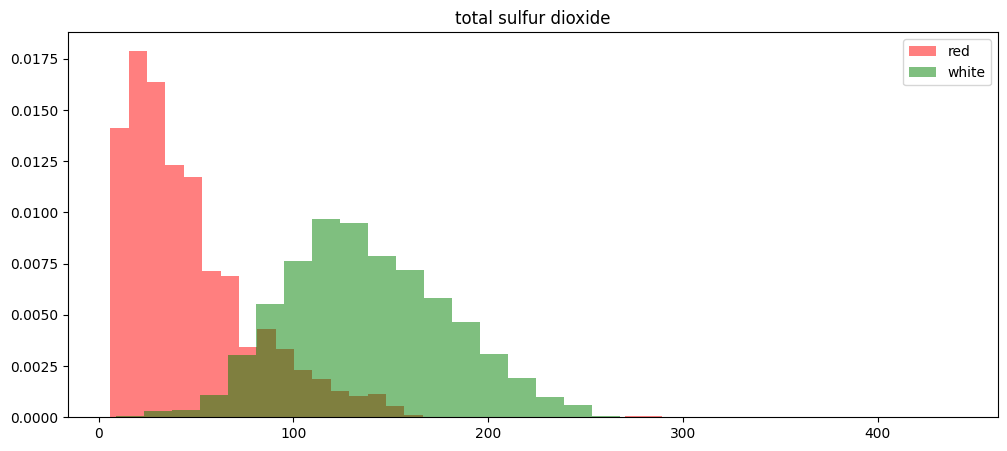

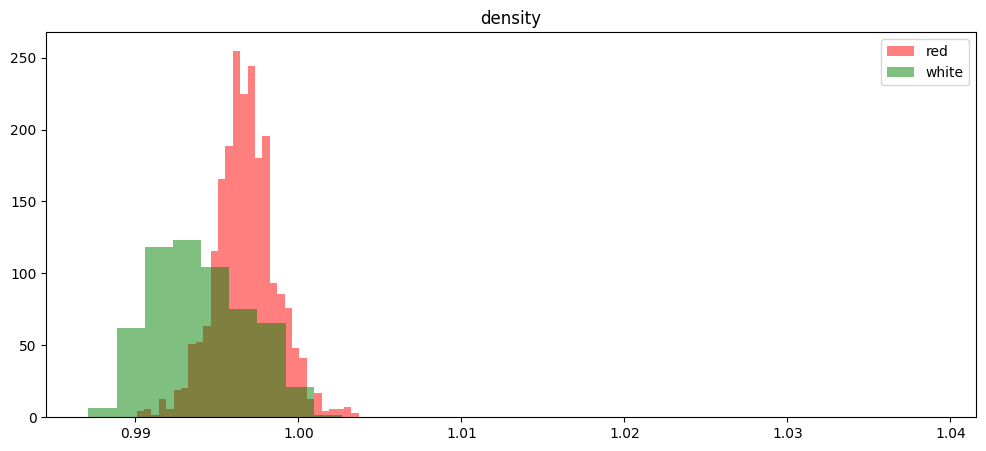

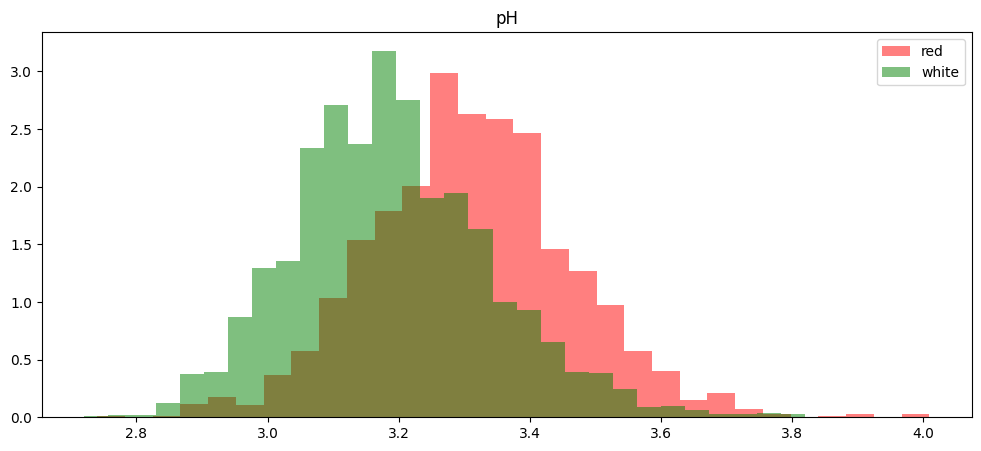

KeyboardInterrupt: 

In [4]:
for col in cols:
    fig = plt.figure(figsize=(12, 5))
    plt.hist(red_wine_[col], bins=30, alpha=0.5, label='red', color='red', density=True)
    plt.hist(white_wine_[col], bins=30, alpha=0.5, label='white', color='green', density=True)
    plt.title(col)
    plt.legend()
    plt.show()


In [ ]:
red_wine_.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
white_wine_.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


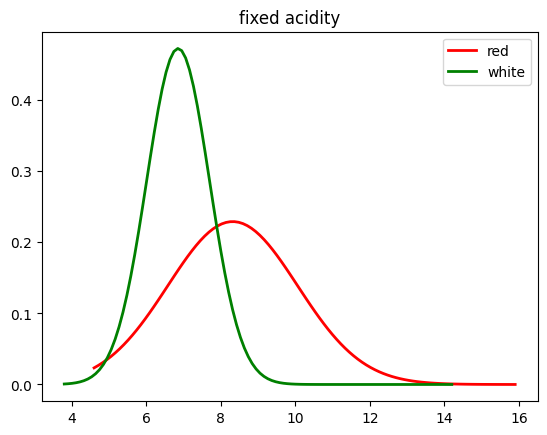

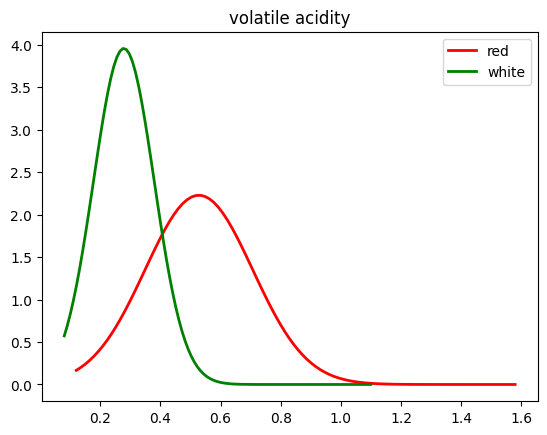

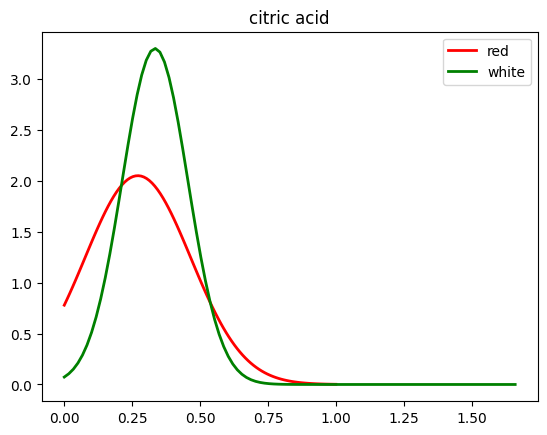

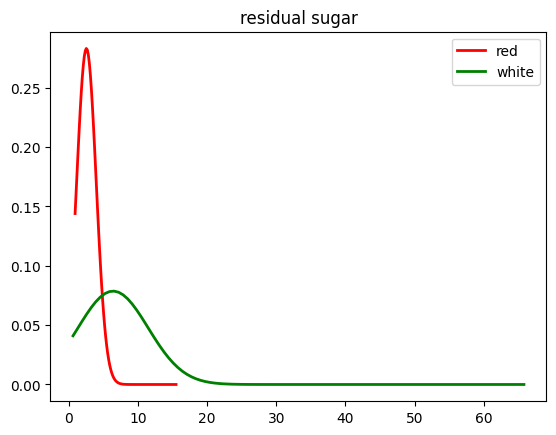

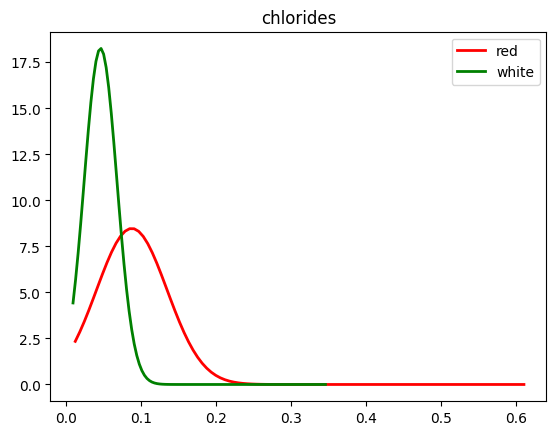

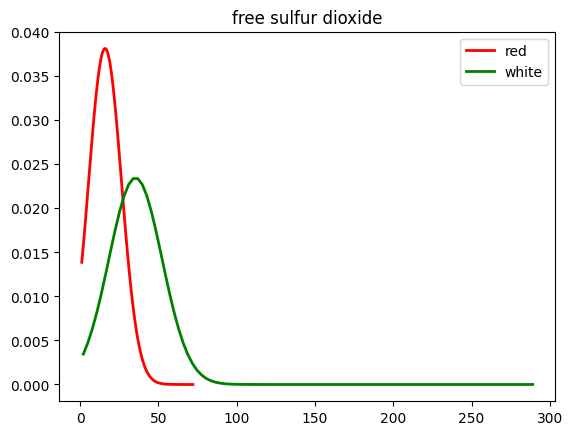

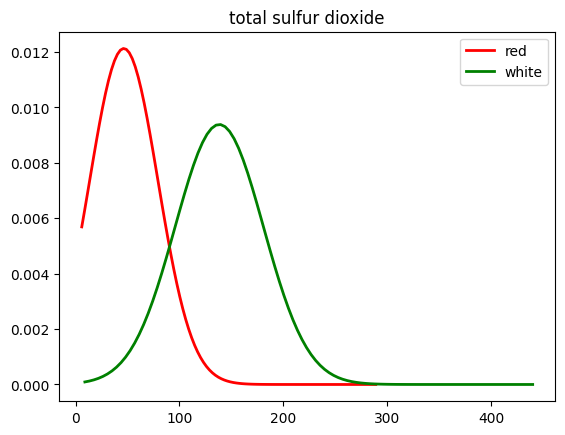

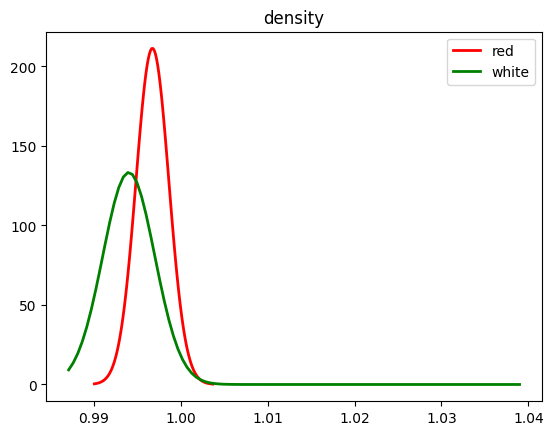

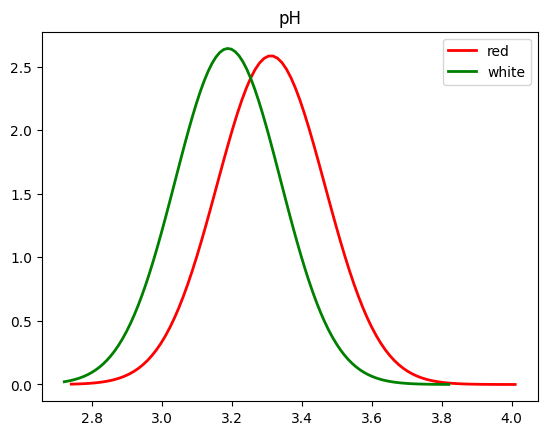

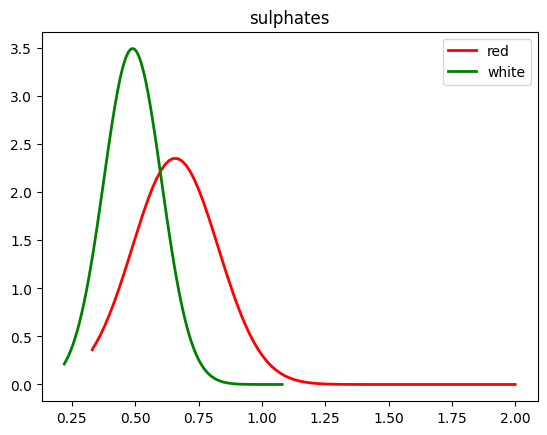

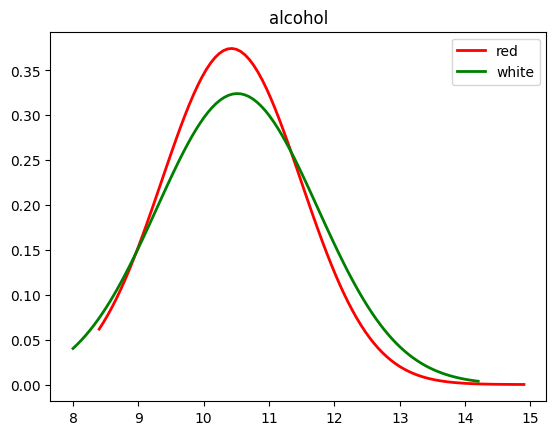

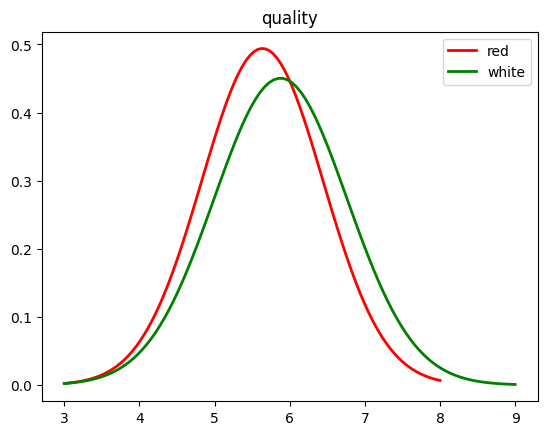

In [ ]:
from scipy.stats import norm

for col in cols:
    mu, std = norm.fit(red_wine_[col])
    xmin_r, xmax_r = np.max(red_wine_[col]), np.min(red_wine_[col])
    xmin_w, xmax_w = np.max(white_wine_[col]), np.min(white_wine_[col])
    x_r = np.linspace(xmin_r, xmax_r, 100)
    p = norm.pdf(x_r, mu, std)
    plt.plot(x_r, p, linewidth=2, label='red', c='red')
    plt.title(col)

    x_w = np.linspace(xmin_w, xmax_w, 100)
    mu, std = norm.fit(white_wine_[col])
    p = norm.pdf(x_w, mu, std)
    plt.plot(x_w, p, linewidth=2, label='white', c='green')

    plt.legend()
    plt.show()

Now we're going to choose the best model for our data, separately for white and red wine.

In [6]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}},

    'LogisticRegression': 
        {'model': LogisticRegression(max_iter=10000),
         'params': {'C': [1, 5, 10]},
         'kernel': ['linear', 'rbf']},

    'DecisionTreeClassifier':
        {'model': tree.DecisionTreeClassifier(),
         'params': {'max_depth': [3, 10, 20, 50, 100, 500, 1000]}},

    'RandomForestClassifier':
        {'model': RandomForestClassifier(),
         'params': {'n_estimators': [10, 20, 50, 100,]}},

    'SVC':
        {'model': SVC(gamma='auto'),
        'params': {'C': [1, 5, 20, 50, 100, 500, 1000],
                    'kernel': ['linear', 'rbf']}},

    'MultinomialNB':
        {'model': MultinomialNB(),
            'params': {}},

    'GradientBoostingClassifier':
        {'model': GradientBoostingClassifier(),
        'params': {'n_estimators': [10, 20, 50, 100, 500]}}
}

In [ ]:
def find_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5)
    return scores.mean()

def find_best_model(X, y):
    scores = {}
    scaler = StandardScaler()
    red_wine_scaled = red_wine_.copy()
    red_wine_scaled[cols] = scaler.fit_transform(red_wine_[cols])
    for model_name, mp in models.items():
        score = find_model(mp['model'], red_wine_.drop('quality', axis=1), red_wine_['quality'])
        scores[model_name] = score

    return scores

red_wine_scores = find_best_model(red_wine_.drop('quality', axis=1), red_wine_['quality'])
white_wine_scores = find_best_model(white_wine_.drop('quality', axis=1), white_wine_['quality'])
print('Red Wine Scores: ', red_wine_scores)
print('White Wine Scores: ', white_wine_scores)

c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Red Wine Scores:  {'LinearRegression': 0.29004162884337065, 'LogisticRegression': 0.5860109717868338, 'DecisionTreeClassifier': 0.49030172413793105, 'RandomForestClassifier': 0.5628624608150471, 'SVC': 0.49154192789968654, 'MultinomialNB': 0.43464537617554855, 'GradientBoostingClassifier': 0.568489420062696}
White Wine Scores:  {'LinearRegression': 0.29004162884337065, 'LogisticRegression': 0.5860109717868338, 'DecisionTreeClassifier': 0.4709286833855799, 'RandomForestClassifier': 0.5734855015673982, 'SVC': 0.49154192789968654, 'MultinomialNB': 0.43464537617554855, 'GradientBoostingClassifier': 0.5647217868338558}


We'll use Logistic Regression, Random Forest, and Gradient Boosting.

In [ ]:
models.pop('LinearRegression')
models.pop('DecisionTreeClassifier')
models.pop('SVC')
models.pop('MultinomialNB') 

{'model': MultinomialNB(), 'params': {}}

In [ ]:
red_scores = {}
white_scores = {}
def tune_model(X, y):
    scores = {}
    for model_name, mp in models.items():
        print('Tuning model: ', model_name)
        gs = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        gs.fit(X, y)
        print('Model tuned: ', model_name)
        scores[model_name] = {
                'score': gs.best_score_,
                'params': gs.best_params_}

    print(scores)
    return scores


In [ ]:
red_scores = tune_model(red_wine_.drop('quality', axis=1), red_wine_['quality'])
white_scores = tune_model(white_wine_.drop('quality', axis=1), white_wine_['quality'])

red_scores = pd.DataFrame(red_scores, index=['model']).T
white_scores = pd.DataFrame(white_scores, index=['model']).T

In [ ]:
red_scores

,model
LogisticRegression,0.588515
RandomForestClassifier,0.572241
GradientBoostingClassifier,0.582874


In [ ]:
white_scores

,model
LogisticRegression,0.523687
RandomForestClassifier,0.533077
GradientBoostingClassifier,0.519603


In [7]:
scaler = StandardScaler()
cols.remove('quality')
red_wine_scaled = red_wine_.drop('quality', axis=1)
red_wine_scaled[cols] = scaler.fit_transform(red_wine_[cols])
white_wine_scaled = white_wine_.drop('quality', axis=1)
white_wine_scaled[cols] = scaler.fit_transform(white_wine_[cols])

red_wine_scaled['quality'] = red_wine_['quality']
white_wine_scaled['quality'] = white_wine_['quality']

red_wine_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


In [ ]:
red_scores = {}
white_scores = {}

red_scores = tune_model(models, X=red_wine_scaled.drop('quality', axis=1), y=red_wine_scaled['quality'])
white_scores = tune_model(models, X=white_wine_scaled.drop('quality', axis=1), y=white_wine_scaled['quality'])

red_scores = pd.DataFrame(red_scores, index=['model']).T
white_scores = pd.DataFrame(white_scores, index=['model']).T

Tuning model:  LogisticRegression
Model tuned:  LogisticRegression
Tuning model:  RandomForestClassifier
Model tuned:  RandomForestClassifier
Tuning model:  GradientBoostingClassifier
Model tuned:  GradientBoostingClassifier
Tuning model:  LogisticRegression
Model tuned:  LogisticRegression
Tuning model:  RandomForestClassifier
Model tuned:  RandomForestClassifier
Tuning model:  GradientBoostingClassifier
Model tuned:  GradientBoostingClassifier


In [ ]:
red_scores

,model
LogisticRegression,0.581019
RandomForestClassifier,0.569111
GradientBoostingClassifier,0.576624


In [ ]:
white_scores

,model
LogisticRegression,0.524707
RandomForestClassifier,0.526948
GradientBoostingClassifier,0.520214


Seemingly, 9 is too many features to use, so we'll use PCA to reduce the number of features.

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

red_pca = pca.fit_transform(red_wine_scaled.drop('quality', axis=1))
white_pca = pca.fit_transform(white_wine_scaled.drop('quality', axis=1))

red_pca = pd.DataFrame(red_pca, columns=['pca1', 'pca2', 'pca3'])
white_pca = pd.DataFrame(white_pca, columns=['pca1', 'pca2', 'pca3'])
red_pca['quality'] = red_wine_['quality']
white_pca['quality'] = white_wine_['quality']

red_pca.head()

,pca1,pca2,pca3,quality
0,-1.619530,0.450950,-1.774454,5
1,-0.799170,1.856553,-0.911690,5
2,-0.748479,0.882039,-1.171394,5
3,2.357673,-0.269976,0.243489,6
4,-1.619530,0.450950,-1.774454,5


In [ ]:
red_pca_scores = {}
white_pca_scores = {}

red_pca_scores = tune_model(X=red_pca.drop('quality', axis=1), y=red_pca['quality'])
white_pca_scores = tune_model(X=white_pca.drop('quality', axis=1), y=white_pca['quality'])

Tuning model:  LogisticRegression
Model tuned:  LogisticRegression
Tuning model:  RandomForestClassifier
Model tuned:  RandomForestClassifier
Tuning model:  GradientBoostingClassifier
Model tuned:  GradientBoostingClassifier
{'LogisticRegression': {'score': 0.5660011755485893, 'params': {'C': 1}}, 'RandomForestClassifier': {'score': 0.5259698275862069, 'params': {'n_estimators': 50}}, 'GradientBoostingClassifier': {'score': 0.5334580721003135, 'params': {'n_estimators': 10}}}
Tuning model:  LogisticRegression
Model tuned:  LogisticRegression
Tuning model:  RandomForestClassifier
Model tuned:  RandomForestClassifier
Tuning model:  GradientBoostingClassifier
Model tuned:  GradientBoostingClassifier
{'LogisticRegression': {'score': 0.4756996935648622, 'params': {'C': 1}}, 'RandomForestClassifier': {'score': 0.44508036105146864, 'params': {'n_estimators': 100}}, 'GradientBoostingClassifier': {'score': 0.477542682037064, 'params': {'n_estimators': 10}}}


In [ ]:
red_pca_scores = pd.DataFrame(red_pca_scores).T 
white_pca_scores = pd.DataFrame(white_pca_scores).T

In [ ]:
red_pca_scores

,score,params
LogisticRegression,0.566001,{'C': 1}
RandomForestClassifier,0.52597,{'n_estimators': 50}
GradientBoostingClassifier,0.533458,{'n_estimators': 10}


In [ ]:
white_pca_scores

,score,params
LogisticRegression,0.4757,{'C': 1}
RandomForestClassifier,0.44508,{'n_estimators': 100}
GradientBoostingClassifier,0.477543,{'n_estimators': 10}


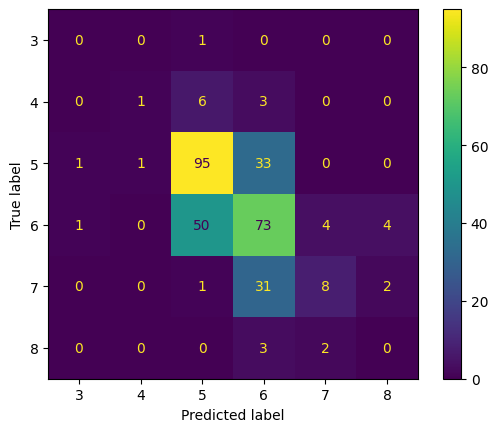

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(red_wine_scaled.drop('quality', axis=1), red_wine_scaled['quality'], test_size=0.2, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=10)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc.classes_)
disp.plot()
plt.show()

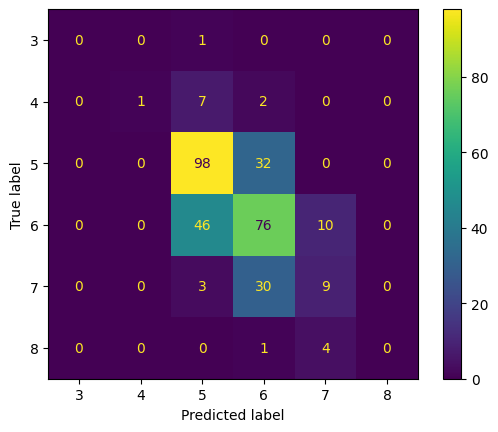

In [ ]:
logr = LogisticRegression(C=1, max_iter=1000)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)
disp.plot()
plt.show()

Models are confused with quality 5 and 6

In [10]:
pca = PCA(0.95)

red_pca_95 = pca.fit_transform(red_wine_scaled.drop('quality', axis=1))

red_pca_95 = pd.DataFrame(red_pca_95)
red_pca_95['quality'] = red_wine_scaled['quality']

red_pca_95.head()

,0,1,2,3,4,5,6,7,8,quality
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,5
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707,5
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857,5
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577,6
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,5


We see that all variables create big variance, so PCA doesn't do much. Seems like given those features, we can't predict quality very well.
There are features that we don't see such as region or sort of grapes, age of the wine, etc. that are for sure important for quality.